In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist
#fashion_mnist.load_data()

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#training images and labels, and testing images and labels

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# corresponds to numbers; 0,    1,         2,          3,          4,   5,        6,        7,       8,       9

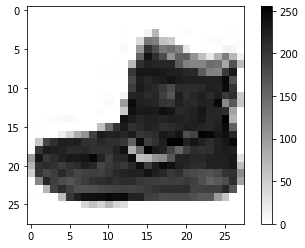

In [11]:
plt.figure()
plt.imshow(train_images[0], cmap='gist_yarg')
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
#pixel values range between 0-255, normalize to 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0

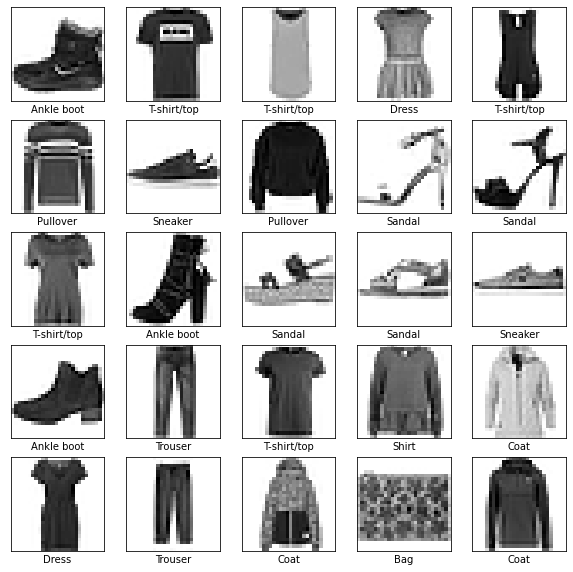

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gist_yarg')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [48]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)), tf.keras.layers.Dense(128, activation='relu'), tf.keras.layers.Dense(10)])
#flatten the images, then network consists of two Dense layers (128 = number of "nodes")

In [49]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
#to optimize, minimise the loss function. use metrics to monitor accuracy (fraction correct)

In [62]:
model.fit(train_images, train_labels, epochs=10)#train model

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2798 - accuracy: 0.8970
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2701 - accuracy: 0.9001
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2573 - accuracy: 0.9046
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2462 - accuracy: 0.9077
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2402 - accuracy: 0.9107
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2313 - accuracy: 0.9136
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2244 - accuracy: 0.9165
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2167 - accuracy: 0.9183
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2090 - accuracy: 0.9211
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.206

In [63]:
#examine accuracy on test data
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc) #less accurate due to overfitting - memorized characteristics of training data 
#too closely, performs worse on new stuff

313/313 - 1s - loss: 0.3406 - accuracy: 0.8884

Test accuracy: 0.8884000182151794


In [64]:
#model's linear output is logits, convert these to probabilities - easier to interpret.
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [65]:
predictions = probability_model.predict(test_images)
predictions[0] #predict the label for each image by assigning each label a probability

array([3.1356822e-09, 4.1812001e-10, 1.0435750e-08, 4.9314997e-10,
       1.5671346e-09, 3.7882052e-04, 1.0089920e-07, 1.1186956e-03,
       4.2118162e-10, 9.9850237e-01], dtype=float32)

In [66]:
np.argmax(predictions[0]) #label of highest confidence

9

In [67]:
np.argmax(predictions[0]) == test_labels[0] #thus its correct!

True

In [68]:
class_names[9] #determined it to be an ankle boot

'Ankle boot'

In [69]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

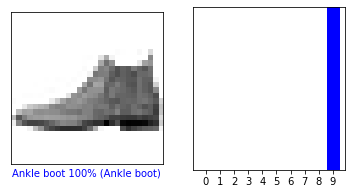

In [70]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show() #correct prediction=blue, incorrect=red

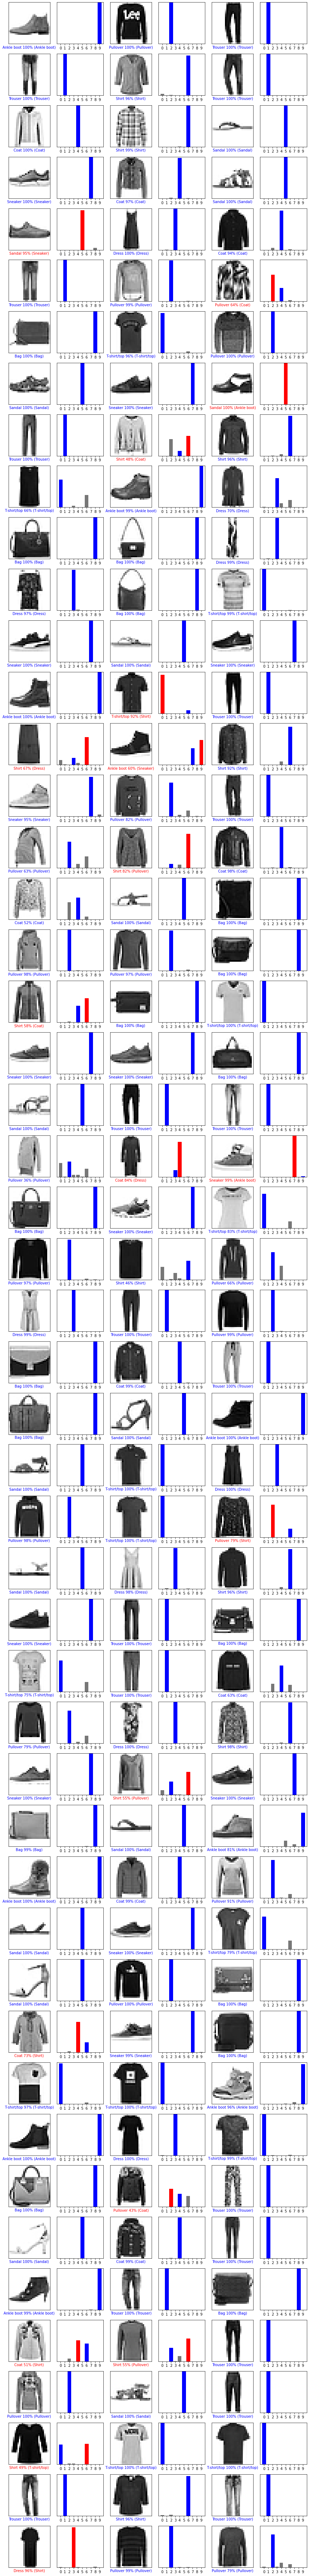

In [71]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 50
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show() #super interesting - this gave a different result from theirs!

In [60]:
# Grab an image from the test dataset to test on one image
img = test_images[1]

# Add the image to a batch where it's the only member (needs to be in this format)
img = (np.expand_dims(img,0))

In [61]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.4581633e-05 3.6929945e-11 9.9937940e-01 8.8073826e-10 3.6855420e-04
  7.2209577e-10 2.3744257e-04 2.1090114e-10 9.3582990e-09 1.2484889e-12]]


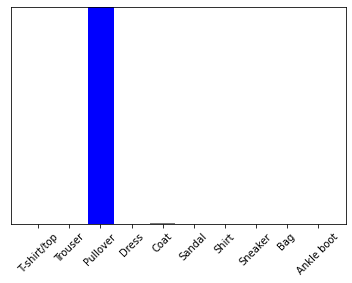

In [31]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [33]:
np.argmax(predictions_single[0]) #correct prediction

2